In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from nltk.tokenize import PunktSentenceTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
%matplotlib inline

In [3]:
df = pd.read_csv('reddit_posts.csv')
df.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,disable_comments,distinguished,...,spoiler,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,NaN,NaN,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,NaN,...,False,False,techsupport,t5_2qioo,NaN,NaN,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,NaN,NaN,False,Silverfin113,NaN,NaN,False,1480697424,NaN,NaN,...,False,False,learnprogramming,t5_2r7yd,NaN,NaN,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,NaN,NaN,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,NaN,...,False,False,gamedev,t5_2qi0a,NaN,NaN,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
3,NaN,NaN,False,[deleted],NaN,NaN,False,1480697634,NaN,NaN,...,False,False,learnprogramming,t5_2r7yd,NaN,NaN,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
4,NaN,NaN,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,NaN,...,False,False,learnpython,t5_2r8ot,NaN,NaN,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...


In [4]:
df.isnull().sum()

adserver_click_url        26688
adserver_imp_pixel        26688
archived                      0
author                        0
author_flair_css_class    26253
author_flair_text         26337
contest_mode                  0
created_utc                   0
disable_comments          26688
distinguished             26603
domain                        0
downs                         0
edited                        0
gilded                        0
hide_score                    0
href_url                  26688
id                            0
imp_pixel                 26688
is_self                       0
link_flair_css_class      22396
link_flair_text           22078
locked                        0
media                     26420
media_embed                   0
mobile_ad_url             26688
name                          0
num_comments                  0
original_link             26688
over_18                       0
permalink                     0
post_hint                 23175
preview 

In [5]:
df.shape

(26688, 53)

**We are just going to drop all columns that have 26,688 null values**

In [8]:
df.drop(df.columns[df.isnull().sum() == 26688], axis = 1, inplace = True)

In [9]:
df.isnull().sum()

archived                      0
author                        0
author_flair_css_class    26253
author_flair_text         26337
contest_mode                  0
created_utc                   0
distinguished             26603
domain                        0
downs                         0
edited                        0
gilded                        0
hide_score                    0
id                            0
is_self                       0
link_flair_css_class      22396
link_flair_text           22078
locked                        0
media                     26420
media_embed                   0
name                          0
num_comments                  0
over_18                       0
permalink                     0
post_hint                 23175
preview                   23175
quarantine                    0
retrieved_on                  0
saved                         0
score                         0
secure_media              26420
secure_media_embed            0
selftext

**There are only a few more that are mostly nulls, we will investigate as to why**

In [10]:
df['author_flair_css_class'].value_counts()

py32bg                 84
commercial-indie       46
py27bg                 43
hobbyist               33
py32bggh               29
none                   29
py3int                 25
noob                   21
intermediate           15
py3intgh               13
student                13
py27bggh               12
DefaultFlair            9
py2int                  8
trusted                 8
commercial-other        8
py3-empty               7
swift                   7
objc-swift              5
flair                   3
bell-bronze             3
pro                     3
python                  2
py2intgh                1
php-contributor         1
emacs                   1
ex-commercial-other     1
py32ad                  1
py27ad                  1
py27exgh                1
objc                    1
py2-empty               1
Name: author_flair_css_class, dtype: int64

**It appears that these are the flairs of authors, we will check the subreddits and see how often people have flairs**

In [11]:
df['subreddit'].value_counts()

techsupport         11423
learnprogramming     3448
technology           2321
learnpython          1724
gamedev              1281
web_design            864
Python                603
javascript            546
linux                 545
javahelp              536
engineering           525
csshelp               393
iOSProgramming        330
swift                 261
programming           254
PHP                   192
computerscience       162
netsec                159
java                  157
compsci               154
django                127
css                   106
cpp                    86
HTML                   85
ruby                   77
flask                  71
html5                  62
jquery                 46
coding                 34
pygame                 34
perl                   24
lisp                   16
programmer             13
dailyprogrammer        10
IPython                 8
inventwithpython        6
pystats                 3
pythoncoding            2
Name: subred

**Checked r/techsupport and very few people have flairs. Might as well drop this column**

In [12]:
df.drop('author_flair_css_class', axis = 1, inplace = True)

In [14]:
df['author_flair_text'].value_counts().head()

@LucklessSeven      17
Nooblet Brewer      10
☺                   10
HH0718               8
@TheThroneOfLies     7
Name: author_flair_text, dtype: int64

**These seem pretty useless and a lot of people don't have them or just have a unique text. Will drop as well.**

In [15]:
df.drop('author_flair_text', axis = 1, inplace = True)

In [16]:
df['distinguished'].value_counts()

moderator    85
Name: distinguished, dtype: int64

**It looks like these are all posts by moderators, and there are only 85 of them in the dataset. Due to the imbalanced nature of this feature, we will exclude it from our feature selection.**

In [18]:
df.drop('distinguished', axis = 1, inplace = True)

In [19]:
df.drop('link_flair_css_class', axis = 1, inplace = True)

In [20]:
df.drop('link_flair_text', axis = 1, inplace = True)

**Dropped these columns as they are related to the flairs.**

In [22]:
df.drop('media', axis = 1, inplace = True)

**Imbalanced column, seems to be if any media was embedded in the post e.g. Youtube videos**

In [25]:
df.drop('post_hint', axis = 1, inplace = True)

In [26]:
df.drop('preview', axis = 1, inplace = True)

**These columns seem useless and imbalanced**

In [28]:
df.drop('secure_media', axis = 1, inplace = True)

**Same as above**

In [29]:
df.isnull().sum()

archived              0
author                0
contest_mode          0
created_utc           0
domain                0
downs                 0
edited                0
gilded                0
hide_score            0
id                    0
is_self               0
locked                0
media_embed           0
name                  0
num_comments          0
over_18               0
permalink             0
quarantine            0
retrieved_on          0
saved                 0
score                 0
secure_media_embed    0
selftext              0
spoiler               0
stickied              0
subreddit             0
subreddit_id          0
thumbnail             0
title                 0
ups                   0
url                   0
dtype: int64

**Now we will go through each feature and describe how we will treat them**

In [30]:
df['archived'].value_counts()

False    26688
Name: archived, dtype: int64

**No point keeping this column**

In [31]:
df.drop('archived', axis = 1, inplace = True)

Author usernames
--

In [33]:
df['author'].value_counts().head()

[deleted]        5947
wilsonharry       156
AutoModerator      90
ebpnovin           58
Hgbnty             46
Name: author, dtype: int64

**Use NLP on usernames if possible (Stem?)**

In [36]:
df['contest_mode'].value_counts()

False    26683
True         5
Name: contest_mode, dtype: int64

**Another unusable feature**

In [37]:
df.drop('contest_mode', axis = 1, inplace = True)

**Time created (UTC)**
--

In [39]:
df['created_utc'].value_counts().head()

1482356776    3
1481768887    3
1480868953    2
1480718188    2
1482008551    2
Name: created_utc, dtype: int64

**We can convert these to datetime, or keep them as is, or create dummy variables after converting to datetime (e.g. day of week)**

Domain
--

In [46]:
df['domain'].value_counts()

self.techsupport                11423
self.learnprogramming            3448
self.learnpython                 1724
self.gamedev                     1191
self.technology                  1152
self.web_design                   749
self.Python                       566
self.javahelp                     536
self.javascript                   482
self.linux                        465
self.engineering                  454
self.csshelp                      393
self.iOSProgramming               315
self.swift                        249
youtube.com                       188
self.PHP                          175
self.computerscience              159
self.compsci                      147
self.java                         138
self.django                       124
self.netsec                        97
self.css                           94
self.HTML                          85
self.cpp                           83
github.com                         75
self.ruby                          72
self.flask  

In [51]:
df.loc[(df['domain'] == 'youtube.com') &(df['author'] != '[deleted]')]

,author,created_utc,domain,downs,edited,gilded,hide_score,id,is_self,locked,...,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url


**As mentioned in the project prompt, this dataset should only contain self posts, posts which are purely text and do not link to an external website. However, it seems like this 'domain' column shows where the post was linked to, and it seems like there are external websites. Every non-self domain I checked always has the author as '[deleted]', which may mean that the post does not exist anymore. After checking on Reddit using the 'title' value, I did not receive any search results. We will drop all rows where the domain is not 'self...'.**

In [52]:
df.loc[df['domain'] == 'youtube.com']

,author,created_utc,domain,downs,edited,gilded,hide_score,id,is_self,locked,...,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url
49,[deleted],1480701022,youtube.com,0.0,False,0.0,False,5g4mvj,False,False,...,"{u'content': u'&lt;iframe class=""embedly-embed...",[deleted],False,False,technology,t5_2qh16,default,HURRYGet free Rs8 paytm cash,1.0,https://www.youtube.com/attribution_link?a=X8C...
127,[deleted],1480706118,youtube.com,0.0,False,0.0,False,5g54r7,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,netsec,t5_1rqwi,default,Apple iOS v10.1.1 - Device Lock Bypass via loc...,1.0,https://www.youtube.com/watch?v=yygvBJBFy4s
284,[deleted],1480718306,youtube.com,0.0,False,0.0,False,5g6a7j,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,gamedev,t5_2qi0a,default,Late Night - The evening antics of a small ind...,1.0,https://www.youtube.com/watch?v=1iaH64mCf-c
701,[deleted],1480762030,youtube.com,0.0,False,0.0,False,5g925x,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,javascript,t5_2qh30,default,Advanced JS performance with V8 and Web Assemb...,1.0,https://www.youtube.com/watch?v=PvZdTZ1Nl5o
727,[deleted],1480766655,youtube.com,0.0,False,0.0,False,5g99xd,False,False,...,{},[deleted],False,False,technology,t5_2qh16,default,How To Create A Google Plus Local Business Pag...,1.0,https://www.youtube.com/attribution_link?a=Bo4...
756,[deleted],1480769933,youtube.com,0.0,False,0.0,False,5g9g2r,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,technology,t5_2qh16,default,Fighting Robots,1.0,https://www.youtube.com/watch?v=KHfYy9reU7U
761,[deleted],1480770721,youtube.com,0.0,False,0.0,False,5g9hr9,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,engineering,t5_2qhpi,default,Robots Fight In Japan,417.0,https://www.youtube.com/watch?v=KHfYy9reU7U
765,[deleted],1480771636,youtube.com,0.0,False,0.0,False,5g9jp8,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,engineering,t5_2qhpi,default,That’s a Fact - Ant Engineer,0.0,https://www.youtube.com/watch?v=tLAXdpKRfbU
826,[deleted],1480777849,youtube.com,0.0,False,0.0,False,5g9y1p,False,False,...,"{u'content': u'&lt;iframe width=""600"" height=""...",[deleted],False,False,technology,t5_2qh16,default,Remove Shortcut Virus From Your Memory or Pen ...,1.0,https://www.youtube.com/watch?v=qg3lFtZKr0k
940,[deleted],1480787642,youtube.com,0.0,False,0.0,False,5gaq57,False,False,...,"{u'content': u'&lt;iframe width=""459"" height=""...",[deleted],False,False,technology,t5_2qh16,default,"""Year 1999 AD"" - A 1967 Film Imagines the Future",1.0,https://www.youtube.com/watch?v=S1p6fmPzoJk


In [61]:
df1 = df[df['domain'].str.contains('self')].copy()

In [62]:
df1['domain'].value_counts()

self.techsupport         11423
self.learnprogramming     3448
self.learnpython          1724
self.gamedev              1191
self.technology           1152
self.web_design            749
self.Python                566
self.javahelp              536
self.javascript            482
self.linux                 465
self.engineering           454
self.csshelp               393
self.iOSProgramming        315
self.swift                 249
self.PHP                   175
self.computerscience       159
self.compsci               147
self.java                  138
self.django                124
self.netsec                 97
self.css                    94
self.HTML                   85
self.cpp                    83
self.ruby                   72
self.flask                  71
self.html5                  50
self.jquery                 41
self.pygame                 34
self.perl                   24
self.lisp                   14
self.programmer             11
self.dailyprogrammer        10
self.IPy

**We can try making dummy variables**

In [63]:
df1['downs'].value_counts()

0.0    24594
Name: downs, dtype: int64

**We can drop this column**

In [64]:
df1.drop('downs', axis = 1, inplace = True)

Edited 
--

In [71]:
df1.loc[df1['edited'] != 'False', 'edited'].shape

(3516,)

**Not sure if we should use this, as it is quite imbalanced, but seeing if the post was edited or not seems interesting for clustering**

Gilded
--

In [72]:
df1['gilded'].value_counts()

0.0    24584
1.0        8
6.0        1
2.0        1
Name: gilded, dtype: int64

**Again, very imbalanced feature, but interesting to see**

In [74]:
df1['hide_score'].value_counts()

False    24594
Name: hide_score, dtype: int64

**We can drop this feature**

In [75]:
df1.drop('hide_score', axis = 1, inplace = True)

ID of post
--

In [77]:
df1['id'].value_counts().head(1)

5iepj7    1
Name: id, dtype: int64

**ID of the post, won't be using**

In [78]:
df1['is_self'].value_counts()

True    24594
Name: is_self, dtype: int64

**All true since we filtered out the non-self posts, so we can drop it**

In [79]:
df1.drop('is_self', axis = 1, inplace = True)

Locked
--

In [80]:
df1['locked'].value_counts()

False    24574
True        20
Name: locked, dtype: int64

**Again, very imbalanced feature, but might be useful to see**

In [81]:
df1['media_embed'].value_counts()

{}    24594
Name: media_embed, dtype: int64

**We can drop this feature**

In [82]:
df1.drop('media_embed', axis = 1, inplace = True)

In [84]:
df1['name'].value_counts().head(1)

t3_5km58z    1
Name: name, dtype: int64

**Some sort of identifier again?**

Number of Comments
--

In [86]:
df1['num_comments'].describe()

count    24594.000000
mean         5.860454
std         48.288929
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       6109.000000
Name: num_comments, dtype: float64

**We can use this feature, from quick glance, most of the posts have very little response, and the highest number of comments is huge at 6,109**

In [96]:
df1.loc[df1['num_comments'] == 6109]

,author,created_utc,domain,edited,gilded,id,locked,name,num_comments,over_18,...,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url
21737,BryAallDay,1482604753,self.technology,1482623455,2.0,5k4dn8,False,t3_5k4dn8,6109.0,False,...,{},"**Edit 2: It's Christmas Eve, everyone; let's...",False,False,technology,t5_2qh16,self,I'm becoming scared of Facebook.,26573.0,https://www.reddit.com/r/technology/comments/5...


In [97]:
df1['url'][21737]

'https://www.reddit.com/r/technology/comments/5k4dn8/im_becoming_scared_of_facebook/'

**Highest number of commented post was about Facebook and concern on user privacy**

Over 18
--

In [99]:
df1['over_18'].value_counts()

False    24561
True        33
Name: over_18, dtype: int64

**Imbalanced, but might be interesting to see for clustering**

Permalink
--

In [101]:
df1['permalink'].value_counts().head(1)

/r/javascript/comments/5kh0rk/how_can_i_create_a_shopping_cart/    1
Name: permalink, dtype: int64

**Seems to contain information we already have in other columns**

In [104]:
df1['quarantine'].value_counts()

False    24594
Name: quarantine, dtype: int64

**We can drop this feature**

In [105]:
df1.drop('quarantine', axis = 1, inplace = True)

Retrieved On
--

In [107]:
df1['retrieved_on'].value_counts().head(1)

1.484401e+09    5
Name: retrieved_on, dtype: int64

In [108]:
df1['created_utc'].value_counts().head(1)

1481768887    3
Name: created_utc, dtype: int64

**Not sure what this column is, but is probably in time UTC format. Maybe the time it was scraped?**

In [109]:
df1['saved'].value_counts()

False    24594
Name: saved, dtype: int64

**We can drop this feature**

In [110]:
def dropcol(dataframe,name):
    dataframe.drop(name, axis = 1, inplace = True)

In [111]:
dropcol(df1, 'saved')

In [112]:
df1.columns

Index([u'author', u'created_utc', u'domain', u'edited', u'gilded', u'id',
       u'locked', u'name', u'num_comments', u'over_18', u'permalink',
       u'retrieved_on', u'score', u'secure_media_embed', u'selftext',
       u'spoiler', u'stickied', u'subreddit', u'subreddit_id', u'thumbnail',
       u'title', u'ups', u'url'],
      dtype='object')

Score
--

In [114]:
df1['score'].describe()

count    24594.000000
mean         6.989957
std        184.860840
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      26573.000000
Name: score, dtype: float64

**We can use. Lots of low scores a few extremely high scores**

In [115]:
df1['secure_media_embed'].value_counts()

{}    24594
Name: secure_media_embed, dtype: int64

**We can drop this column**

In [116]:
dropcol(df1, 'secure_media_embed')

Selftext
--

In [118]:
df1['selftext'][0]

'I have a Sony surround sound system for a blu-ray player with the 4.2mm connectors. Is there a way I can play all my other devices through my speakers. What kind of connectors and amps do I need to get it to work'

**Feature we will be using NLP on**

In [120]:
df1['spoiler'].value_counts()

False    24594
Name: spoiler, dtype: int64

**We can drop this column**

In [121]:
dropcol(df1, 'spoiler')

In [122]:
df1['stickied'].value_counts()

False    24593
True         1
Name: stickied, dtype: int64

**Too imbalanced, we will not use**

In [125]:
df1['subreddit'].value_counts().head()

techsupport         11423
learnprogramming     3448
learnpython          1724
gamedev              1191
technology           1152
Name: subreddit, dtype: int64

**Similar to domains, we will choose either one and make dummy variables**

In [127]:
df1['subreddit_id'].value_counts().head()

t5_2qioo    11423
t5_2r7yd     3448
t5_2r8ot     1724
t5_2qi0a     1191
t5_2qh16     1152
Name: subreddit_id, dtype: int64

**Subreddit ID, won't use**

In [128]:
df1['thumbnail'].value_counts()

self       18192
default     6386
nsfw          16
Name: thumbnail, dtype: int64

**Not sure if I should use**

Title of post
--

In [131]:
df1['title'][0]

'Help with audio set-up'

**We can conduct NLP on title as well**

In [133]:
df1['ups'].describe()

count    24594.000000
mean         6.989957
std        184.860840
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      26573.000000
Name: ups, dtype: float64

**Seems to be the same as Score, we will use one of them as a feature**

In [135]:
df1['url'].value_counts().head(1)

https://www.reddit.com/r/csshelp/comments/5g8df7/having_difficulties_adding_the_logo_to_my_private/    1
Name: url, dtype: int64

**URL, won't use**

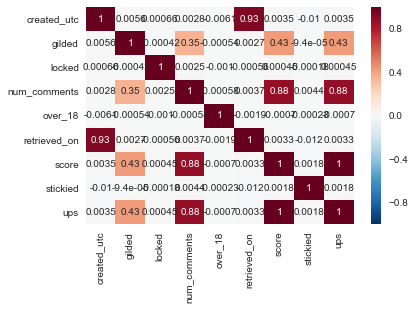

In [139]:
sns.heatmap(df1.corr(), annot = True)

In [136]:
titledf = df1['title'].copy()

In [137]:
textdf = df1['selftext'].copy()

In [140]:
titledf.to_csv('titledf.csv')

In [141]:
textdf.to_csv('textdf.csv')

In [142]:
df1.to_csv('df1.csv')